 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [244]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt




%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [245]:
whale_returns_csv = Path("Resources/whale_returns.csv")

In [246]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.tail(5) # this data given whale investment company 5 years reutrns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
1059,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [247]:
# Count nulls
whale_returns_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [248]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df



,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [249]:
whale_returns_df["Date"] = pd.to_datetime(whale_returns_df["Date"]).dt.date
whale_returns_df = whale_returns_df.set_index('Date')
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [250]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.tail(10) # this Algorithmic Daily Returns given the 5 years of algo 1,2 daily return

,Date,Algo 1,Algo 2
1231,2019-04-17,-0.010301,-0.005228
1232,2019-04-18,-0.000588,-0.001229
1233,2019-04-22,0.000677,-0.001936
1234,2019-04-23,0.004969,0.009622
1235,2019-04-24,0.001095,0.000399
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570
1240,2019-05-01,0.000094,-0.007358


In [251]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [252]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [253]:
algo_returns_df["Date"] = pd.to_datetime(algo_returns_df["Date"]).dt.date
algo_returns_df = algo_returns_df.set_index('Date')

algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [254]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history)
sp_tsx_history_df.head(10) # s&p tsx 60 7 years of price data

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
5,9-Oct-2012,"$12,273.57"
6,10-Oct-2012,"$12,212.42"
7,11-Oct-2012,"$12,233.95"
8,12-Oct-2012,"$12,202.04"
9,15-Oct-2012,"$12,229.96"


In [255]:
# Check Data Types
sp_tsx_history_df.dtypes

Date     object
Close    object
dtype: object

In [256]:
# Fix Data Types
sp_tsx_history_df['Close'] = pd.to_numeric(sp_tsx_history_df['Close'].str.strip("$").str.replace(',', ''), errors='coerce') # change Close data type to float that I can do numeric calculations
sp_tsx_history_df['Close'] = pd.to_numeric(sp_tsx_history_df["Close"])
sp_tsx_history_df["Date"] = pd.to_datetime(sp_tsx_history_df["Date"]).dt.date #setting date formate as same as the last two dataframe

In [257]:
# Calculate Daily Returns
sp_tsx_history_df = sp_tsx_history_df.set_index('Date')

sp_tsx_history_df['S&P TSX 60 Returns'] = sp_tsx_history_df['Close'].pct_change()
 

sp_tsx_history_df.head(10) 


,Close,S&P TSX 60 Returns
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709
2012-10-10,12212.42,-0.004982
2012-10-11,12233.95,0.001763
2012-10-12,12202.04,-0.002608


In [258]:
# Rename `Close` Column to be specific to this portfolio.


sp_tsx_history_df.drop("Close", axis=1, inplace=True)


sp_tsx_history_df

,S&P TSX 60 Returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [259]:
# sp_tsx_daily_returns.to_csv('/Users/Yulie/Documents/pandas-homework/A-Whale-Off-the-Portfolio/sp_tsx_history_df.csv')


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [260]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df], axis=1, join = 'inner' )
all_portfolio_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

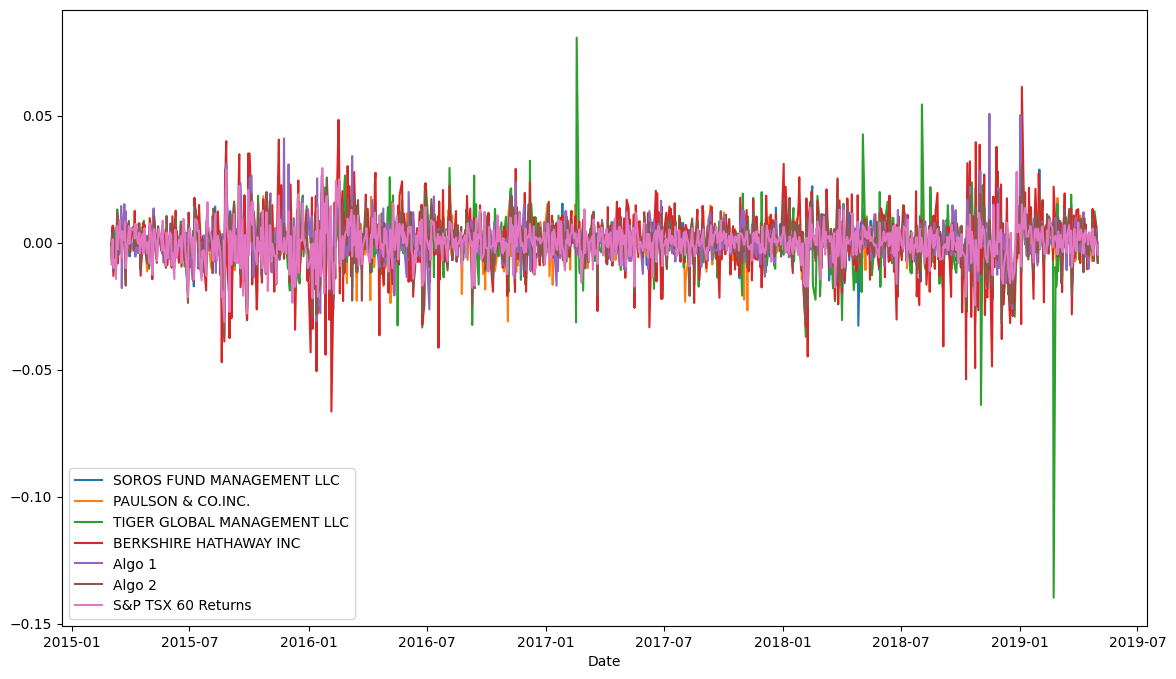

In [261]:
# Plot daily returns of all portfolios
# Assuming you have a DataFrame named all_portfolio_returns containing the daily returns of all portfolios
all_portfolio_returns.plot(kind='line', figsize=(14, 8))




#### Calculate and Plot cumulative returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2019-04-17,1.109258,0.757046,0.845151,1.332247,1.997470,1.196948,1.068446
2019-04-18,1.110864,0.757971,0.845642,1.334800,1.996296,1.195477,1.072874
2019-04-22,1.107991,0.752413,0.842564,1.333348,1.997646,1.193163,1.070580
2019-04-23,1.115933,0.755035,0.848017,1.351052,2.007574,1.204643,1.076529
2019-04-24,1.118481,0.755797,0.844625,1.342424,2.009772,1.205124,1.071176
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071
2019-04-30,1.127228,0.762119,0.855749,1.365054,2.021675,1.204187,1.070803


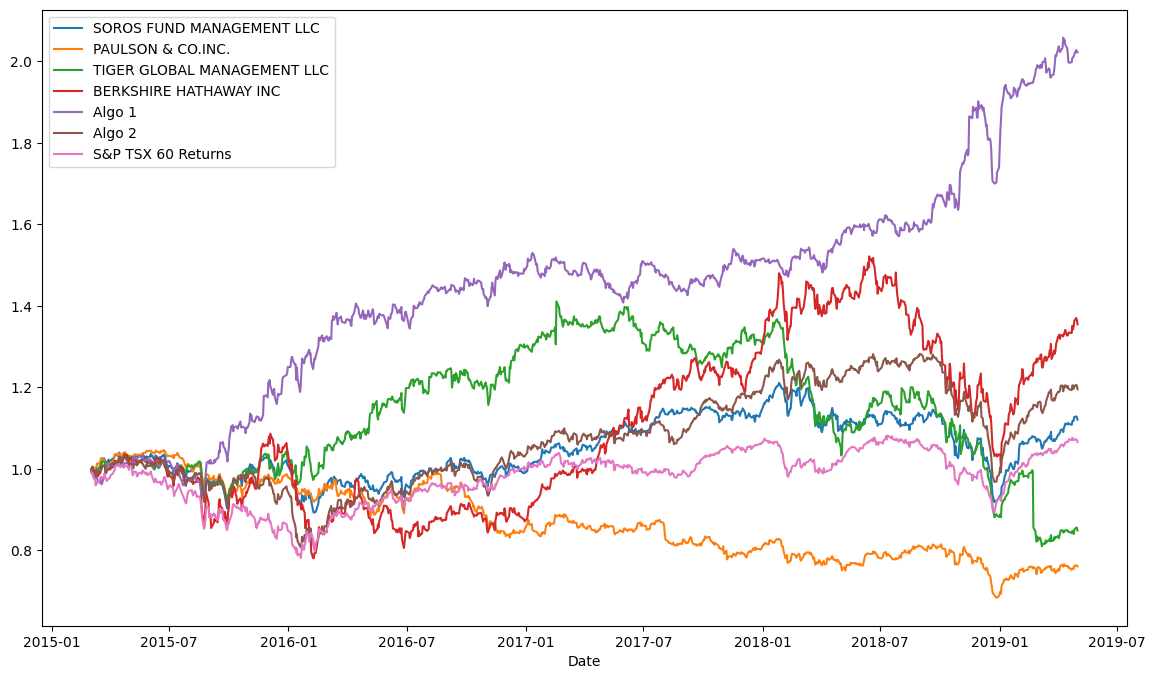

In [262]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 8))
cumulative_returns.tail(10)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Text(0, 0.5, 'Returns')

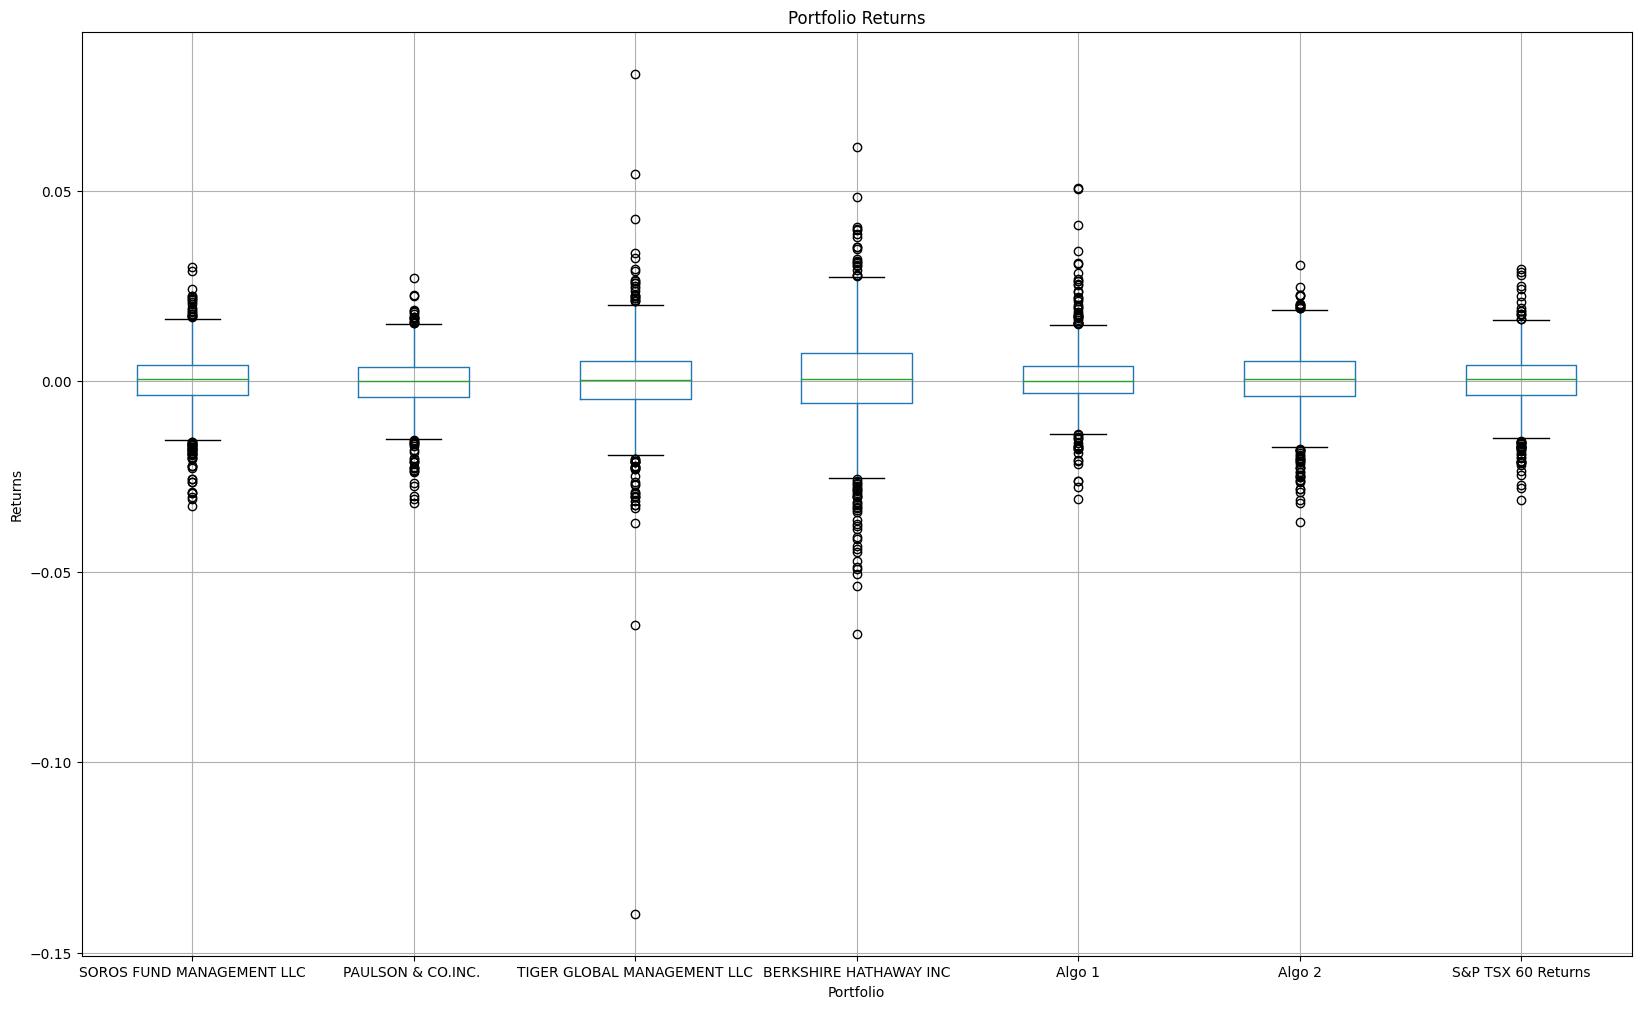

In [263]:


# Assuming `all_portfolio_returns` contains the data for all portfolios

# Specify the columns for the portfolios
portfolio_columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2','S&P TSX 60 Returns']

# Create a box plot for each portfolio
all_portfolio_returns[portfolio_columns].boxplot(figsize=(20,12))

# Set the title and labels for the plot
plt.title('Portfolio Returns')
plt.xlabel('Portfolio')
plt.ylabel('Returns')

# Show the plot


### Calculate Standard Deviations

In [264]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_portfolio_returns.std()
daily_std


SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60 Returns             0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [265]:
# ALL the portfolios are riskier than S&P TSX 60 expect PAULSON & CO.INC.

### Calculate the Annualized Standard Deviation

In [266]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = daily_std * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60 Returns             0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

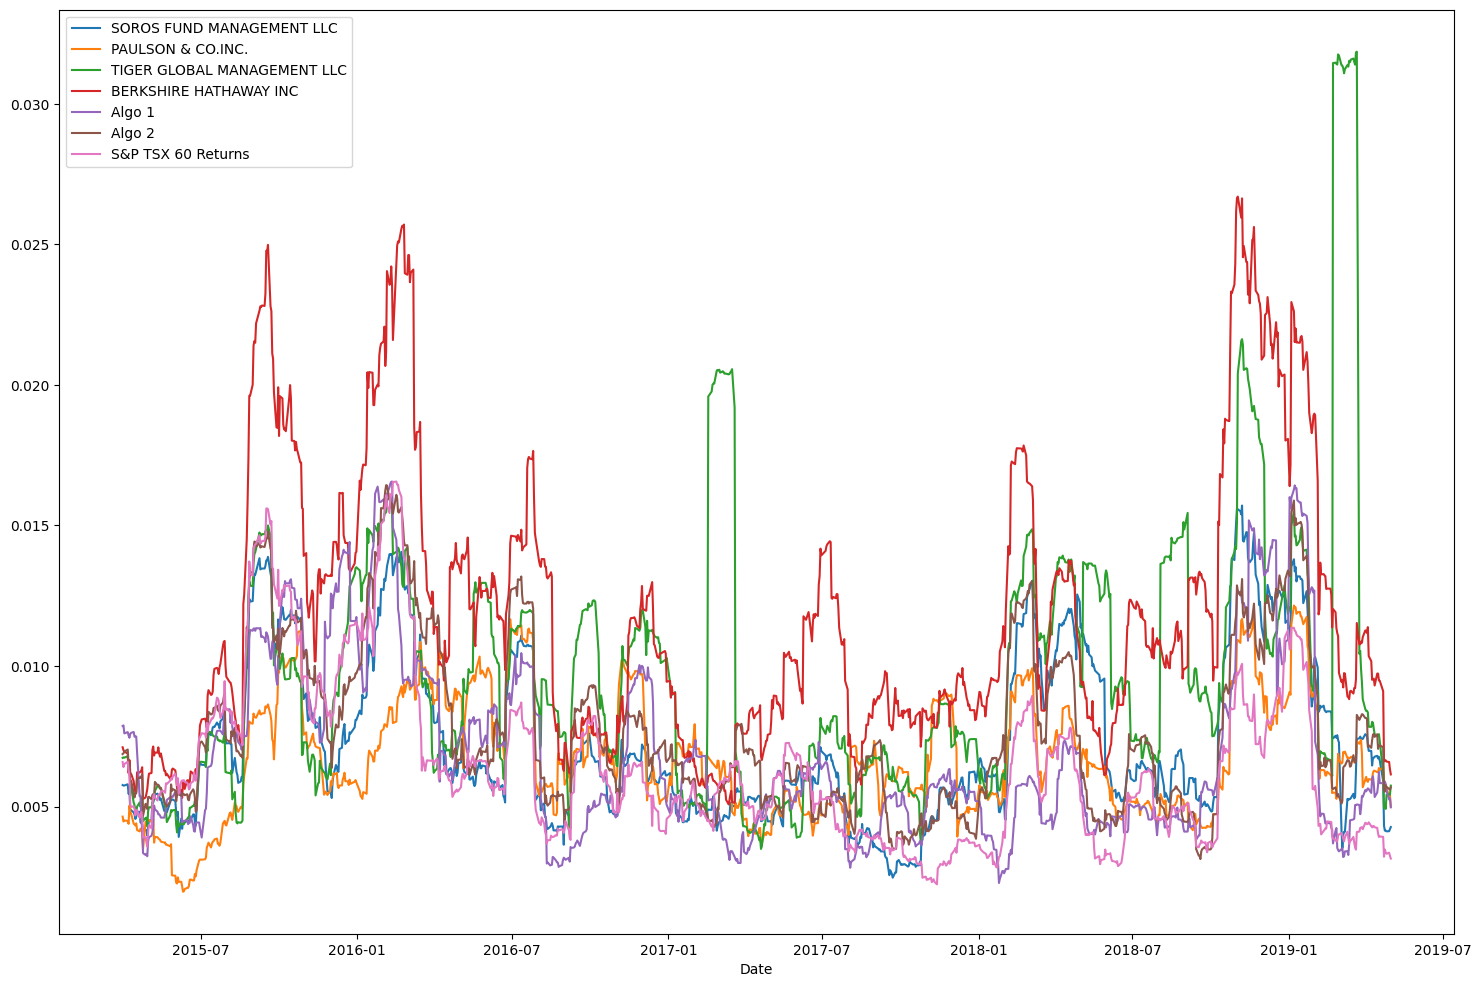

In [267]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_returns.rolling(window=21).std().plot(figsize=(18, 12))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [268]:
# Calculate the correlation
correlation_all_portfolio = all_portfolio_returns.corr()
# Display de correlation matrix
correlation_all_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60 Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

4.9479515915130934e-05
1.6563000308911375e-05
0.33474459081856894


<Axes: title={'center': 'Rolling 30-Day Beta of Algo 1 '}, xlabel='Date'>

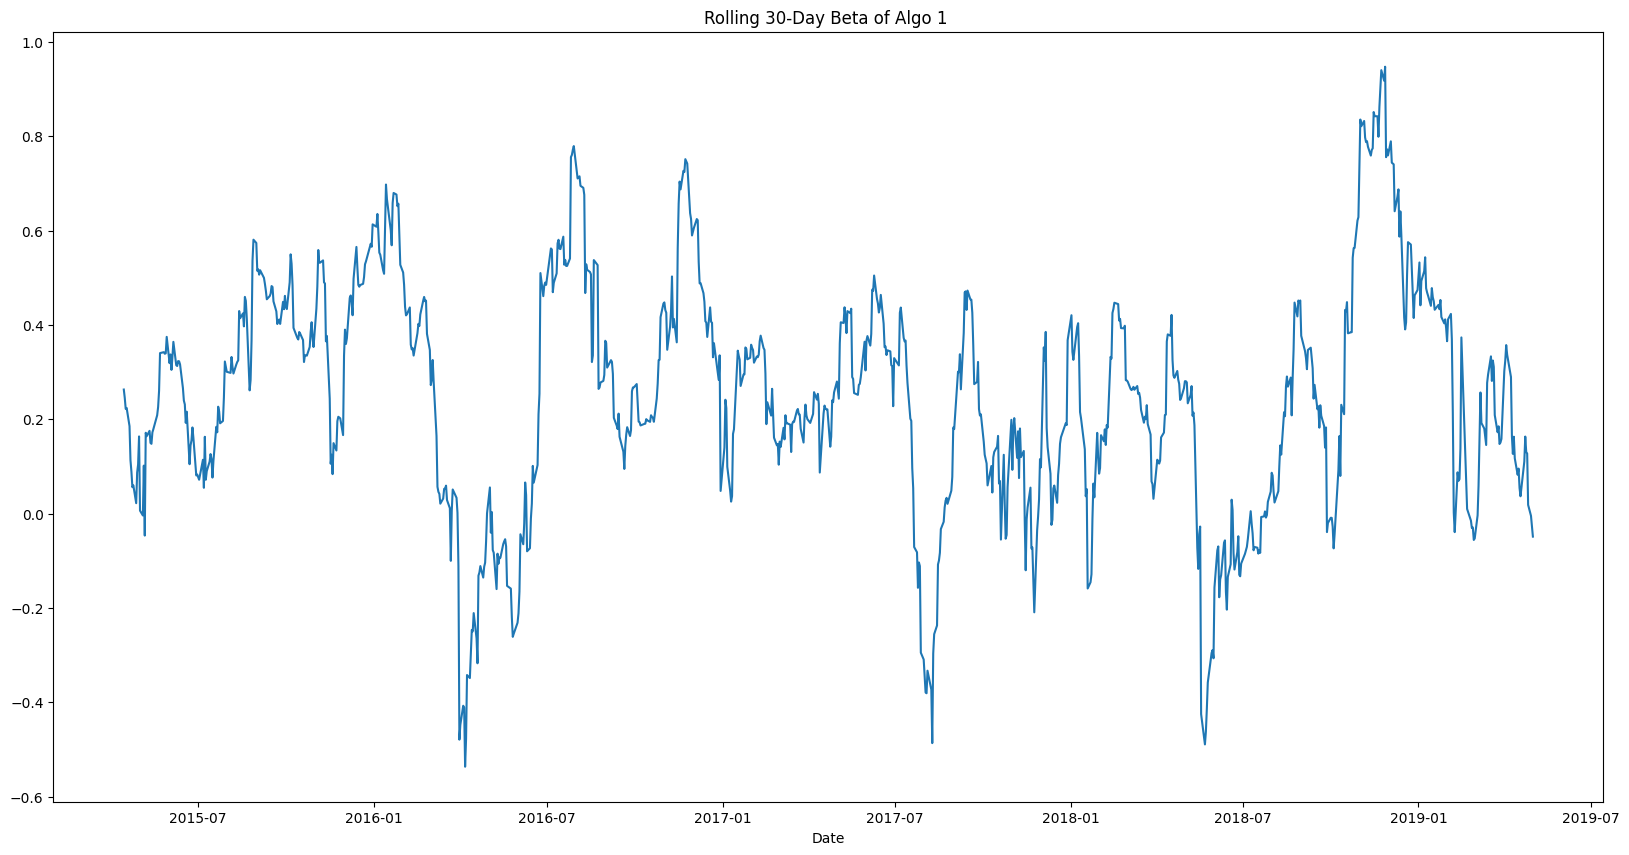

In [269]:
# Calculate covariance of a single portfolio with S&P TSX 60 Returns
covariance_algo1 = all_portfolio_returns['Algo 1'].cov(all_portfolio_returns['S&P TSX 60 Returns'])

# Calculate variance of S&P TSX
variance_sp_tsx = all_portfolio_returns['S&P TSX 60 Returns'].var()
print(variance_sp_tsx)
print(covariance_algo1)
# Computing beta
algo1_beta = covariance_algo1 / variance_sp_tsx
print(algo1_beta)
# Plot beta trend

rolling_covariance_algo1 = all_portfolio_returns['Algo 1'].rolling(window=30).cov(all_portfolio_returns['S&P TSX 60 Returns']) # Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_variance_sp_tsx = all_portfolio_returns['S&P TSX 60 Returns'].rolling(window=30).var() # Calculate 30-day rolling variance of S&P TSX 60 Returns
rolling_algo1_beta = rolling_covariance_algo1 / rolling_variance_sp_tsx
rolling_algo1_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Algo 1 ")



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

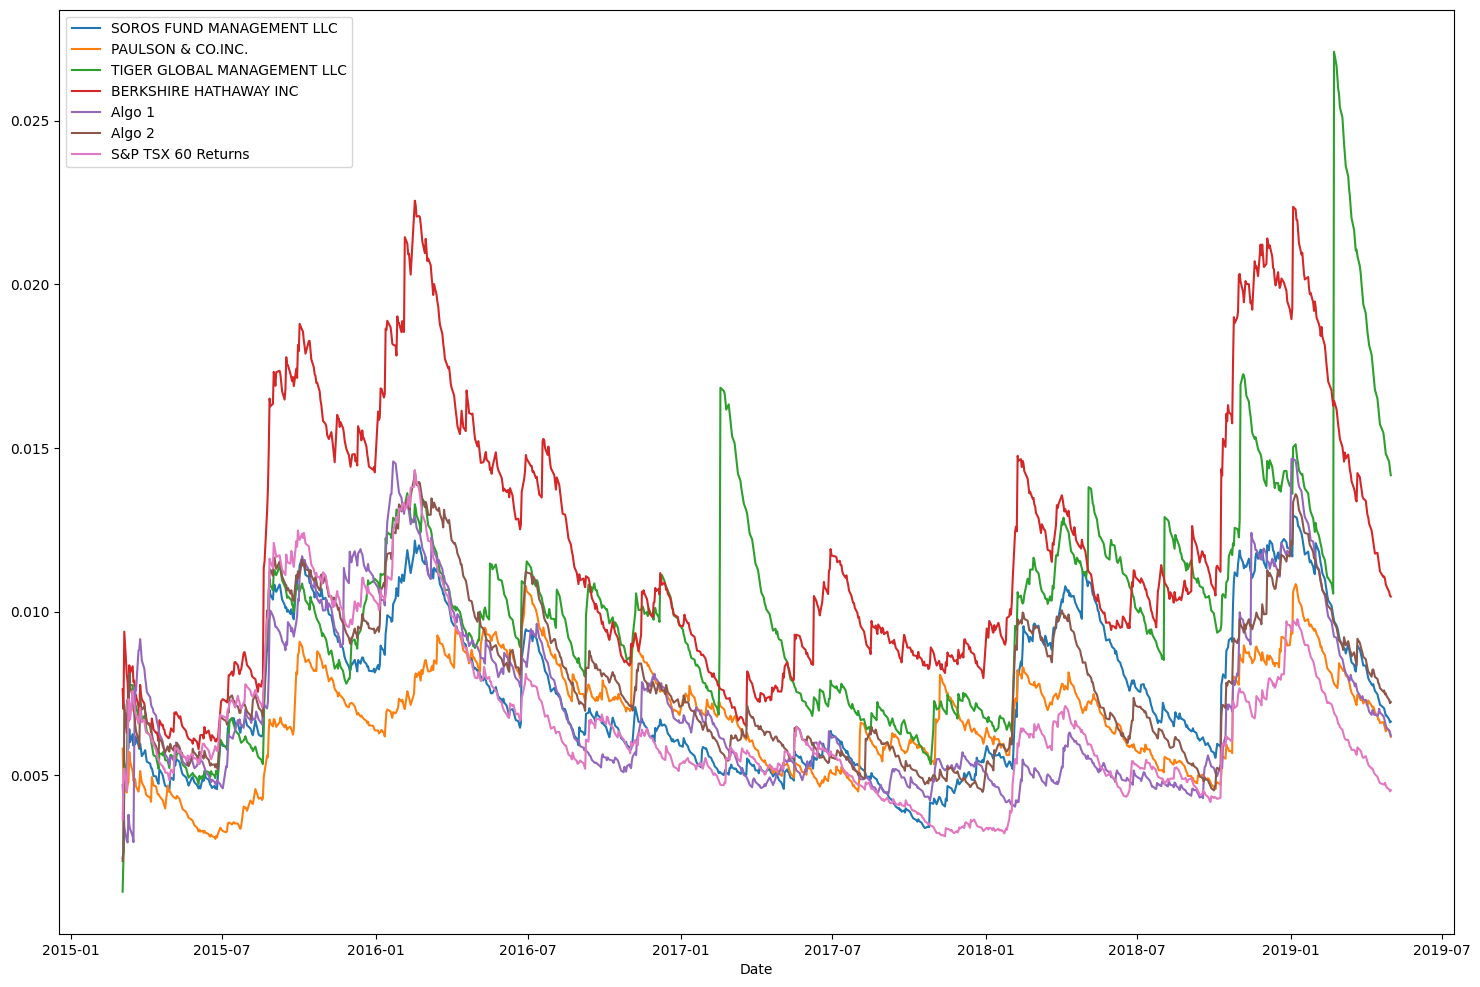

In [270]:
# Use `ewm` to calculate the rolling window
ewm_std = all_portfolio_returns.ewm(halflife=21).std()
ewm_std.plot(figsize=(18, 12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [271]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolio_returns.mean()-all_portfolio_returns['S&P TSX 60 Returns'].mean()) * 252) / (all_portfolio_returns.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios of all Portfolios Peturns'}>

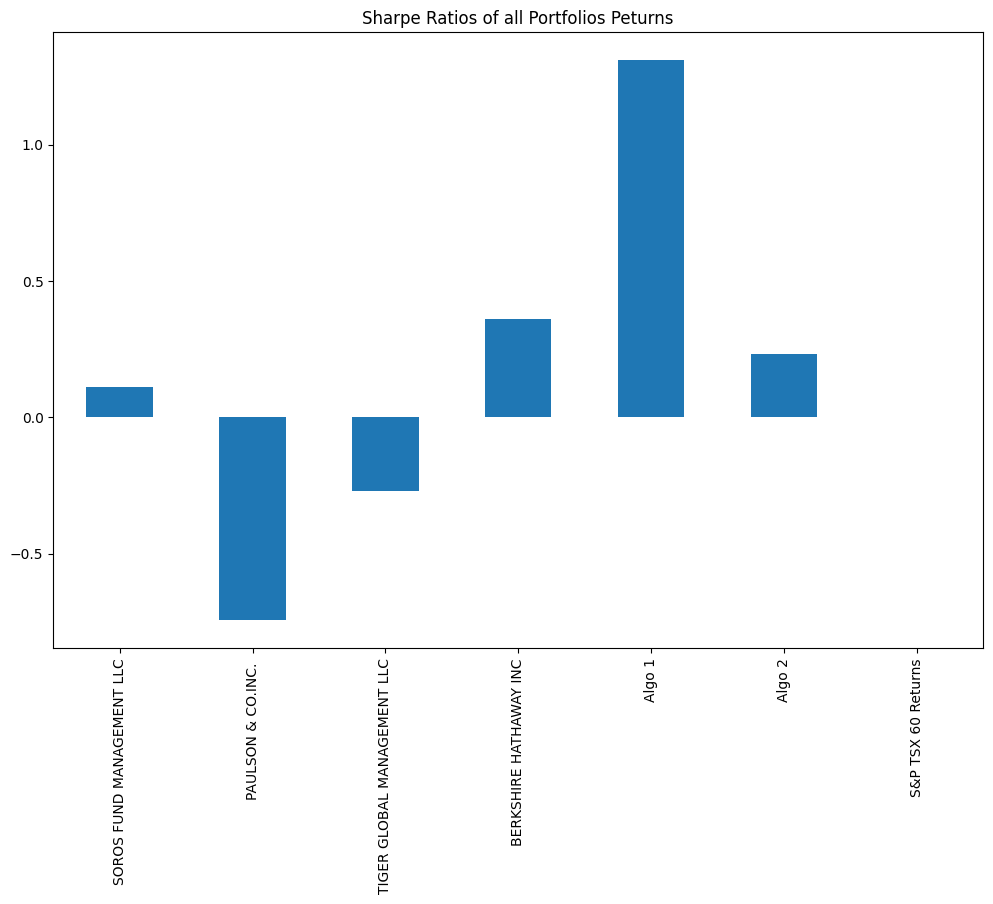

In [272]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar',figsize = (12,8), title="Sharpe Ratios of all Portfolios Peturns")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [273]:
l_csv = Path("Resources/l_historical.csv")
otex_csv = Path("Resources/otex_historical.csv")
shop_csv = Path("Resources/shop_historical.csv")
l_df = pd.read_csv(l_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df = pd.read_csv(otex_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df = pd.read_csv(shop_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df


C:\Users\Yulie\AppData\Local\Temp\ipykernel_34720\1639263695.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  l_df = pd.read_csv(l_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\Yulie\AppData\Local\Temp\ipykernel_34720\1639263695.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  otex_df = pd.read_csv(otex_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\Yulie\AppData\Local\Temp\ipykernel_34720\1639263695.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be r

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [274]:
otex_df

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [275]:
shop_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [276]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([l_df, otex_df,shop_df], axis=0, join="inner")
all_stocks

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [277]:


all_stocks = all_stocks.reset_index()  # Reset Date index
all_stocks = all_stocks.pivot_table(values="Close", index="Date", columns="Symbol") # Reorganize portfolio data by having a column per symbol




In [278]:
all_stocks.sample(10)

Symbol,L,OTEX,SHOP
Date,,,
2018-11-22,60.04,44.09,176.38
2019-12-06,72.10,56.58,483.35
2019-08-28,71.82,51.25,525.63
2018-03-27,53.67,43.91,165.65
2018-05-14,55.95,44.35,182.30
2019-08-12,70.70,50.80,485.68
2019-05-23,70.00,54.39,365.87
2018-02-21,55.22,44.05,168.64
2018-02-22,54.24,43.90,170.52


In [279]:
# Calculate daily returns
all_stock_daily_return = all_stocks.pct_change()

# Drop NAs
all_stock_daily_return.dropna(inplace=True)
# Display sample data
all_stock_daily_return.sample(10)

Symbol,L,OTEX,SHOP
Date,,,
2019-09-11,-0.017447,0.008726,0.034539
2019-02-20,-0.002249,0.001815,-0.014181
2018-02-22,-0.017747,-0.003405,0.011148
2018-01-08,-0.009753,-0.009631,0.016392
2019-02-04,0.008755,0.012942,0.019530
2019-02-25,0.013419,0.008633,0.025925
2018-09-18,0.021088,-0.002213,0.050652
2019-09-06,-0.000404,-0.003458,-0.034282
2019-08-23,-0.011417,-0.013651,-0.016710


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [280]:
# Set weights
weights = [0.3, 0.3, 0.1]

# Calculate portfolio return

portfolio_returns_all_stocks = all_stock_daily_return.dot(weights)

# Display sample data
portfolio_returns_all_stocks

Date
2018-01-03   -0.004171
2018-01-04    0.000647
2018-01-05   -0.002523
2018-01-08   -0.004176
2018-01-09    0.001352
                ...   
2019-12-20    0.007846
2019-12-23   -0.005323
2019-12-24    0.000315
2019-12-27    0.003629
2019-12-30   -0.007817
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [281]:
# Join returns DataFrame to the original returns DataFrame
portfolio_returns_all_stocks.name = 'My Portfolio Returns'
all_portfolio_returns = all_portfolio_returns.join(portfolio_returns_all_stocks)




In [282]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns,My Portfolio Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.004171
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000647
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.002523
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.004176
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.001352
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003763
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.000393
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.000338


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [283]:
# Calculate the annualized `std`
all_portfolio_returns_annualized_std = all_portfolio_returns.std()* np.sqrt(252)


In [284]:
all_portfolio_returns_annualized_std.head(10).sort_values(ascending=True)

S&P TSX 60 Returns             0.099121
PAULSON & CO.INC.              0.114343
My Portfolio Returns           0.118006
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

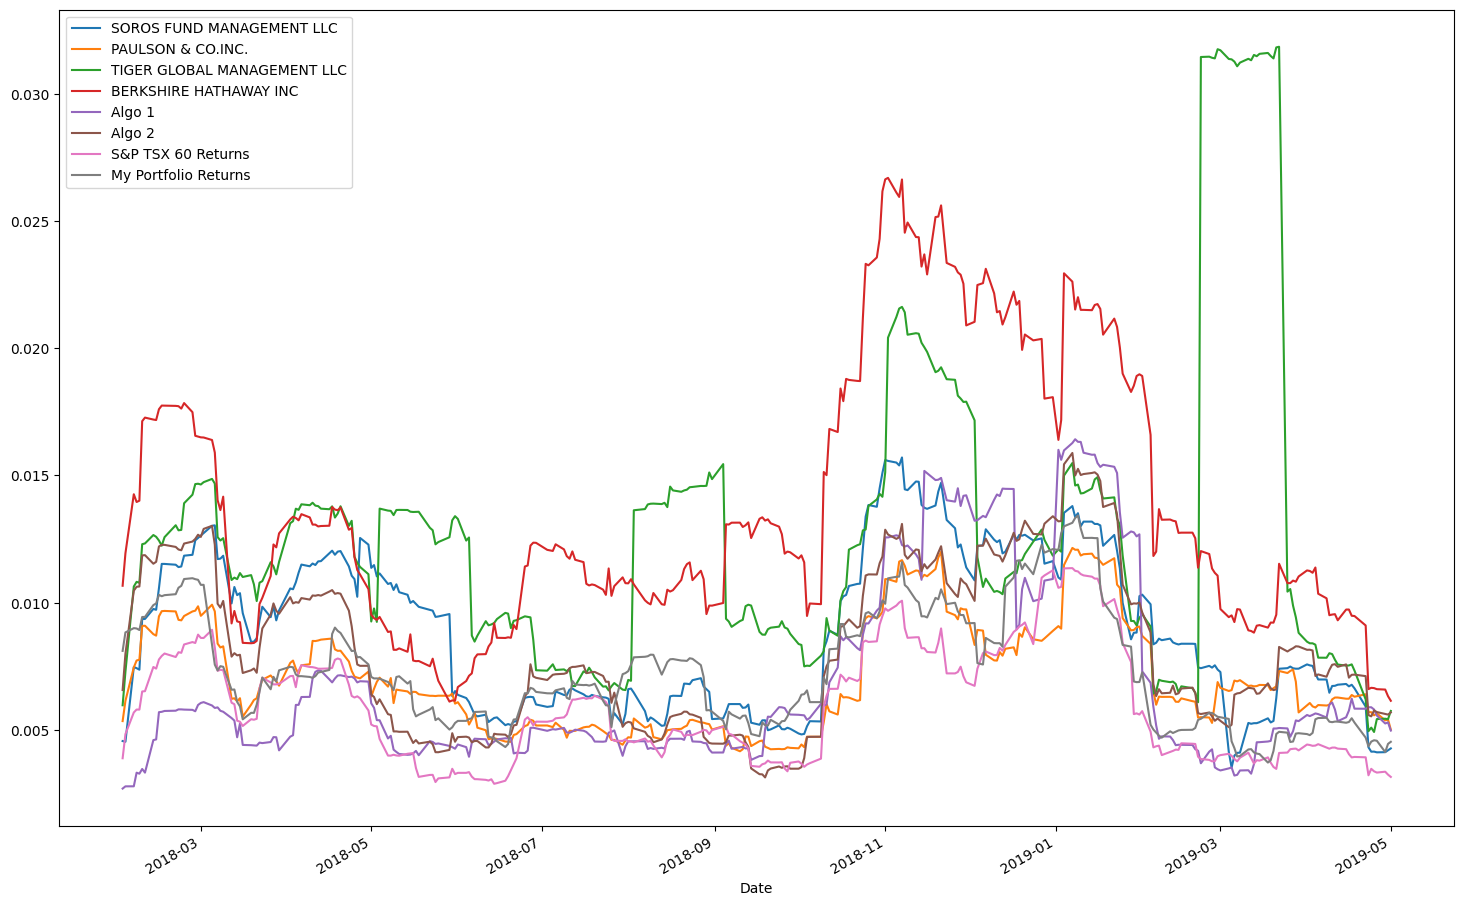

In [285]:
# Calculate rolling standard deviation & Plot rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(figsize=(18, 12))




### Calculate and plot the correlation

<Axes: >

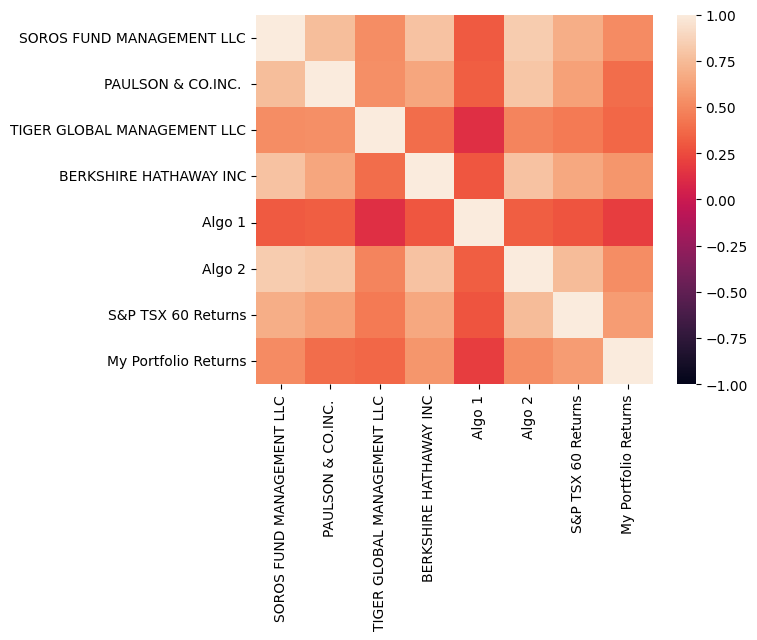

In [286]:
# Calculate and plot the correlation
correlation_all_portfolio_returns = all_portfolio_returns.corr()
correlation_all_portfolio_returns

import seaborn as sns
sns.heatmap(correlation_all_portfolio_returns, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

0.5592387795465938


<Axes: title={'center': "Rolling 60-Day Beta of 'My Portfolio Returns "}, xlabel='Date'>

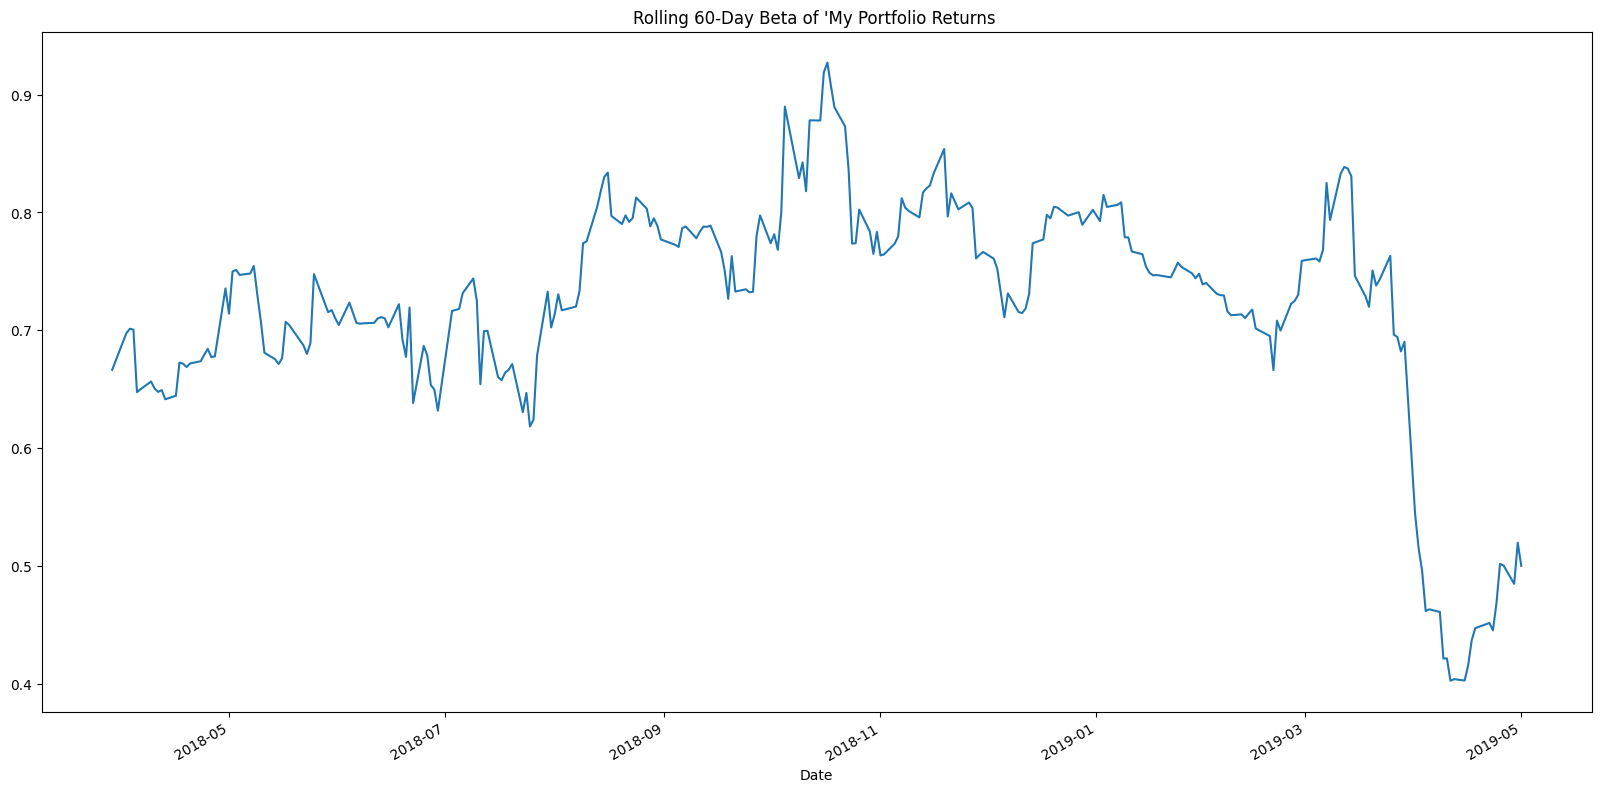

In [287]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio with S&P TSX 60 Returns
covariance_my_portfolio_return = all_portfolio_returns['My Portfolio Returns'].cov(all_portfolio_returns['S&P TSX 60 Returns'])


# Computing beta
my_portfolio_return = covariance_my_portfolio_return / variance_sp_tsx
print(my_portfolio_return)
# Plot beta trend

rolling_covariance_my_portfolio_return = all_portfolio_returns['My Portfolio Returns'].rolling(window=60).cov(all_portfolio_returns['S&P TSX 60 Returns']) # Calculate 60-day rolling_my_portfolio_return vs. S&P 500 and plot the data
rolling_variance_sp_tsx_60day = all_portfolio_returns['S&P TSX 60 Returns'].rolling(window=60).var() # Calculate 30-day rolling variance of S&P TSX 60 Returns
rolling_my_portfolio_return_beta = rolling_covariance_my_portfolio_return / rolling_variance_sp_tsx_60day # caculate My Portfolio Returns rolling beta
rolling_my_portfolio_return_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of 'My Portfolio Returns ")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [292]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_new = ((all_portfolio_returns.mean()-all_portfolio_returns['S&P TSX 60 Returns'].mean()) * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios_new.sort_values(ascending=True)

TIGER GLOBAL MANAGEMENT LLC   -1.407236
PAULSON & CO.INC.             -0.426319
SOROS FUND MANAGEMENT LLC     -0.111773
Algo 2                        -0.003555
S&P TSX 60 Returns             0.000000
BERKSHIRE HATHAWAY INC         0.180806
My Portfolio Returns           1.302054
Algo 1                         1.872846
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

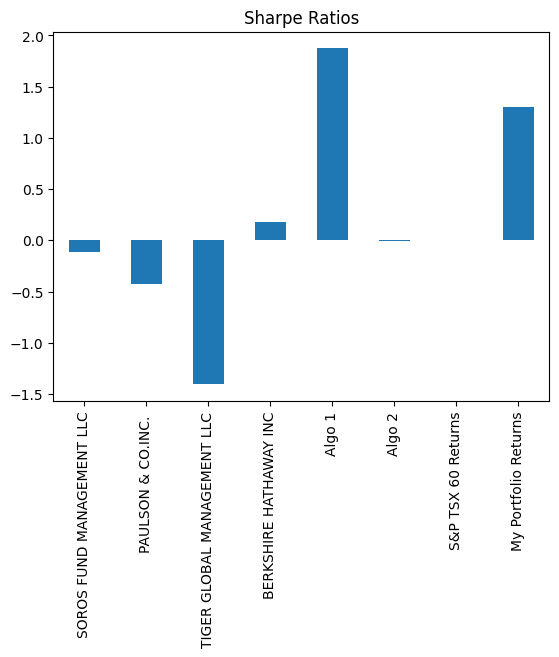

In [290]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar", title="Sharpe Ratios")

### How does my portfolio do?

My portfolio is porform better than most of the portflios on the market from 2018 May to 2019 May, and it has a very good sharpe ratios 1.3, but algo 1 still be the best performed portflios